In [21]:
import numpy as np

def box_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    height, width = image.shape
    output = np.zeros_like(image)

    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='constant')

    for i in range(pad_width, height + pad_width):
        for j in range(pad_width, width + pad_width):
            output[i - pad_width, j - pad_width] = np.sum(kernel * padded_image[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1])

    return output.astype(np.uint8)


Text(0.5, 1.0, 'Kernel 20')

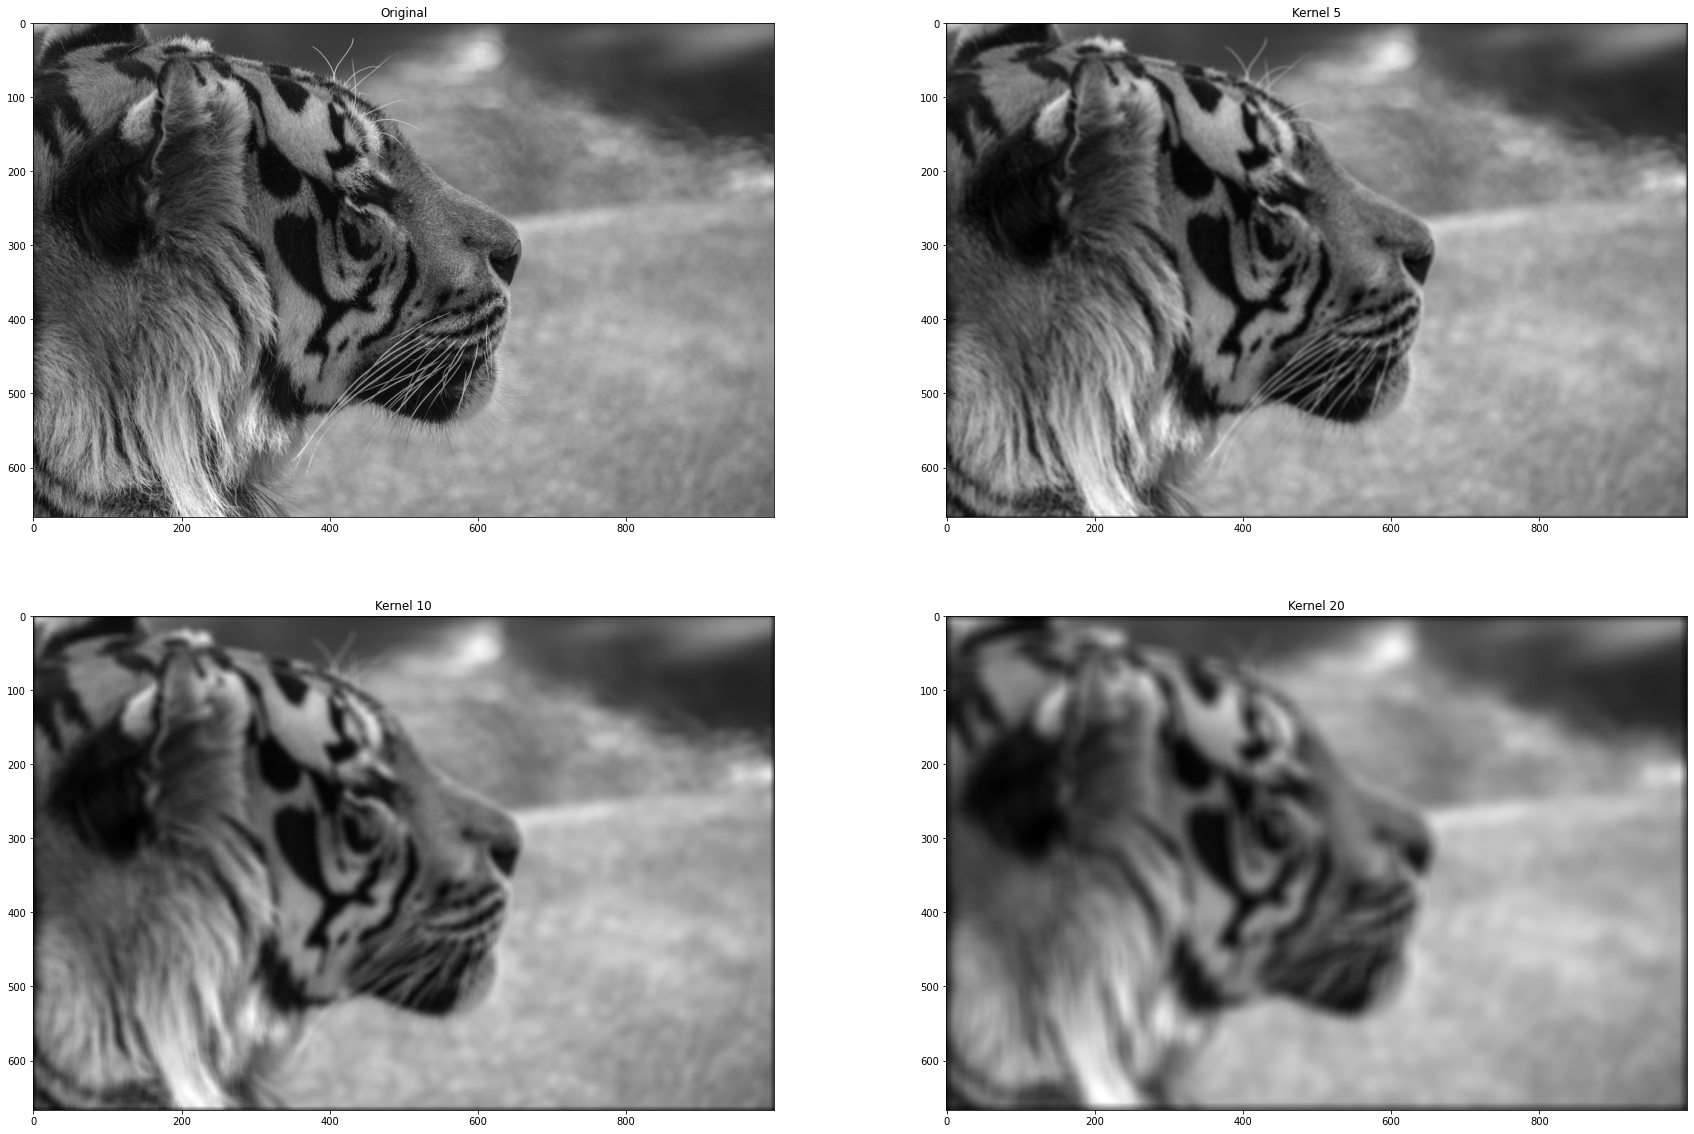

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load PNG image as grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

filter_5 = box_filter(image,5)
filter_10 = box_filter(image,10)
filter_20 = box_filter(image,20)

fig,axs = plt.subplots(2,2, figsize = (30,20))
axs[0,0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original')
axs[0,1].imshow(filter_5, cmap='gray')
axs[0, 1].set_title('Kernel 5')
axs[1,0].imshow(filter_10, cmap='gray')
axs[1, 0].set_title('Kernel 10')
axs[1,1].imshow(filter_20, cmap='gray')
axs[1, 1].set_title('Kernel 20')

